In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pwlf
from numpy import genfromtxt

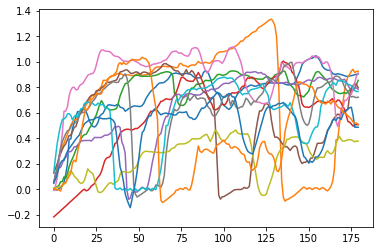

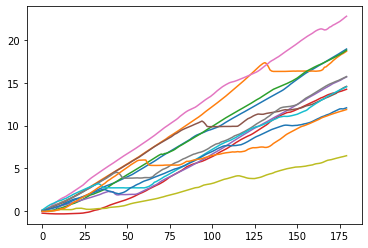

In [6]:
student_1_force = np.zeros([12,180])
student_1_strain = np.zeros([12,180])

for i in range(12):
    student_1_force[i,:] = genfromtxt('./data/student_1_force_'+str(i+1)+'.csv', delimiter=',')
    student_1_strain[i,:] = genfromtxt('./data/student_1_strain_'+str(i+1)+'.csv', delimiter=',')

for i in range(12):
    plt.plot(student_1_force[i,:])
plt.show()
    
for i in range(12):
    plt.plot(student_1_strain[i,:])
plt.show()
    

# plt.plot(force); plt.grid(); plt.title('Actual force'); plt.show()
# plt.plot(strain); plt.grid(); plt.title('Continuous strain (inferred by plant inversion)'); plt.show()

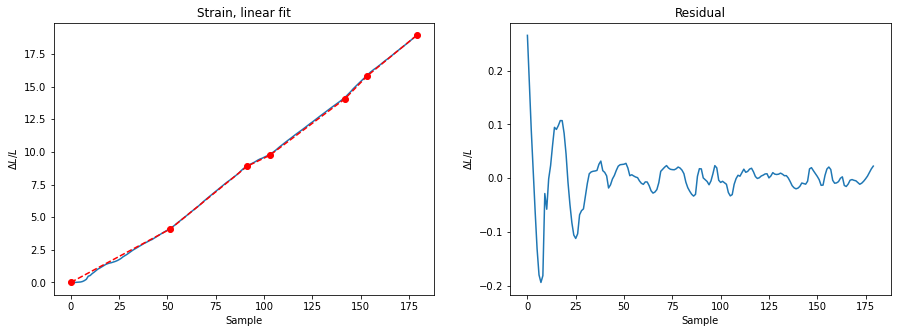

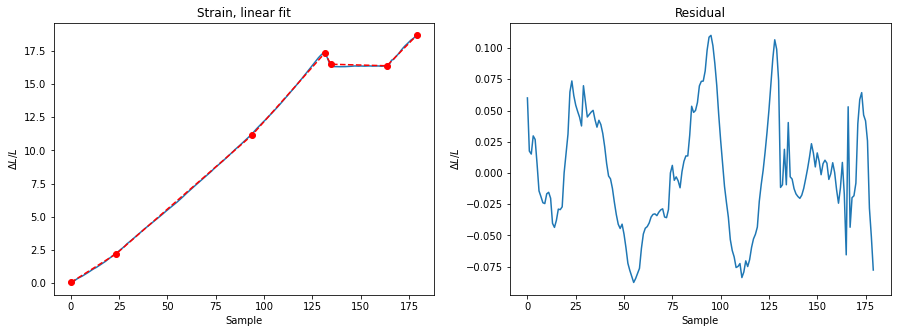

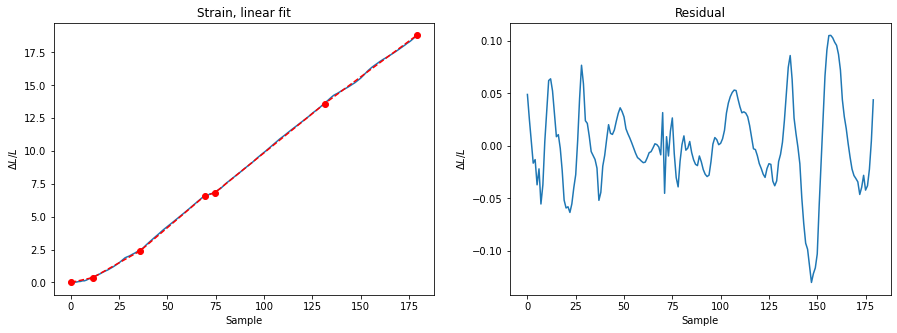

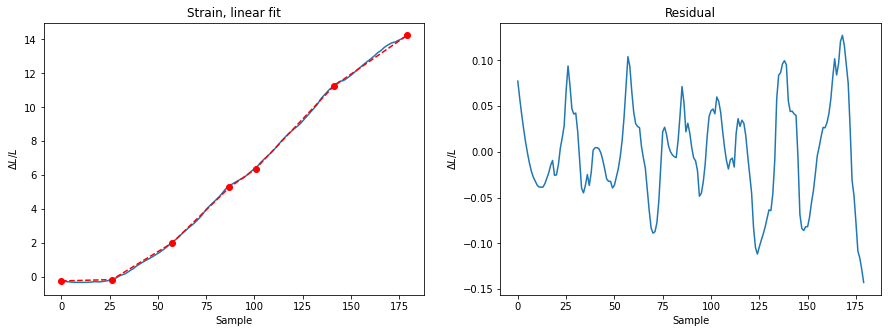

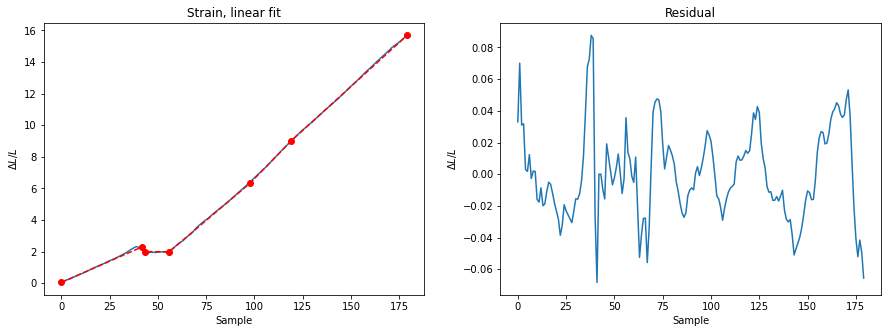

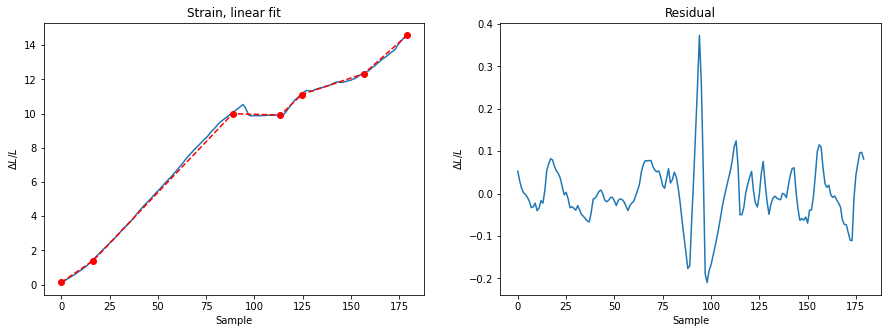

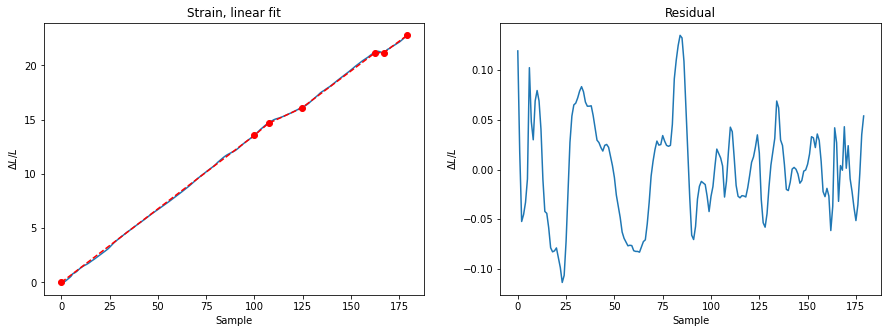

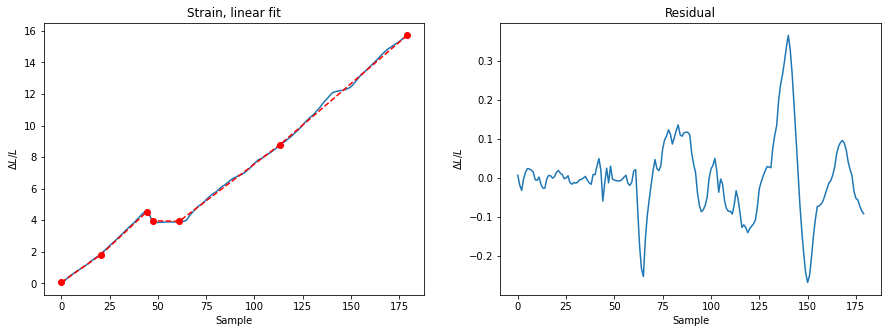

KeyboardInterrupt: 

In [3]:
student_1_strain_ref = np.zeros([12,180])
student_1_strain_rate_ref = np.zeros([12,180])

for i in range(12):
    cut = i
    x = np.arange(0,180)
    y = student_1_strain[cut,:]

    #   initialize piecwise linear fit with your x and y data
    myPWLF = pwlf.PiecewiseLinFit(x,y)

    #   fit the data for four line segments
    res = myPWLF.fit(6)

    #   predict for the determined points
    xHat = np.linspace(min(x), max(x), num=180)
    yHat = myPWLF.predict(xHat)
    student_1_strain_ref[i,:] = yHat

    plt.figure(figsize=(15,5))
    
    plt.subplot(1,2,1)
    plt.plot(x,y); #plt.plot(xHat,yHat,'--')
    plt.plot(res,y[res.astype(int)],'--ro')
    plt.xlabel('Sample')
    plt.ylabel('$\Delta L/L$')
    plt.title('Strain, linear fit')
    
    plt.subplot(1,2,2)
    plt.plot(x,y-yHat)
    plt.xlabel('Sample')
    plt.ylabel('$\Delta L/L$')
    plt.title('Residual')
    
    plt.show()

In [ ]:
for i in range(12):
    plt.plot(student_1_strain_ref[i,:])
    plt.plot(student_1_strain[i,:],'--',alpha=0.6)

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pwlf

# your data
y = np.array([0.00000000e+00, 9.69801700e-03, 2.94350340e-02,
              4.39052750e-02, 5.45343950e-02, 6.74104940e-02,
              8.34831790e-02, 1.02580042e-01, 1.22767939e-01,
              1.42172312e-01, 0.00000000e+00, 8.58600000e-06,
              8.31543400e-03, 2.34184100e-02, 3.39709150e-02,
              4.03581990e-02, 4.53545600e-02, 5.02345260e-02,
              5.55253360e-02, 6.14750770e-02, 6.82125120e-02,
              7.55892510e-02, 8.38356810e-02, 9.26413070e-02,
              1.02039790e-01, 1.11688258e-01, 1.21390666e-01,
              1.31196948e-01, 0.00000000e+00, 1.56706510e-02,
              3.54628780e-02, 4.63739040e-02, 5.61442590e-02,
              6.78542550e-02, 8.16388310e-02, 9.77756110e-02,
              1.16531753e-01, 1.37038283e-01, 0.00000000e+00,
              1.16951050e-02, 3.12089850e-02, 4.41776550e-02,
              5.42877590e-02, 6.63321350e-02, 8.07655920e-02,
              9.70363280e-02, 1.15706975e-01, 1.36687642e-01,
              0.00000000e+00, 1.50144640e-02, 3.44519970e-02,
              4.55907760e-02, 5.59556700e-02, 6.88450940e-02,
              8.41374060e-02, 1.01254006e-01, 1.20605073e-01,
              1.41881288e-01, 1.62618058e-01])
x = np.array([0.00000000e+00, 8.82678000e-03, 3.25615100e-02,
              5.66106800e-02, 7.95549800e-02, 1.00936330e-01,
              1.20351520e-01, 1.37442010e-01, 1.51858250e-01,
              1.64433570e-01, 0.00000000e+00, -2.12600000e-05,
              7.03872000e-03, 1.85494500e-02, 3.00926700e-02,
              4.17617000e-02, 5.37279600e-02, 6.54941000e-02,
              7.68092100e-02, 8.76596300e-02, 9.80525800e-02,
              1.07961810e-01, 1.17305210e-01, 1.26063930e-01,
              1.34180360e-01, 1.41725010e-01, 1.48629710e-01,
              1.55374770e-01, 0.00000000e+00, 1.65610200e-02,
              3.91016100e-02, 6.18679400e-02, 8.30997400e-02,
              1.02132890e-01, 1.19011260e-01, 1.34620080e-01,
              1.49429370e-01, 1.63539960e-01, -0.00000000e+00,
              1.01980300e-02, 3.28642800e-02, 5.59461900e-02,
              7.81388400e-02, 9.84458400e-02, 1.16270210e-01,
              1.31279040e-01, 1.45437090e-01, 1.59627540e-01,
              0.00000000e+00, 1.63404300e-02, 4.00086000e-02,
              6.34390200e-02, 8.51085900e-02, 1.04787860e-01,
              1.22120350e-01, 1.36931660e-01, 1.50958760e-01,
              1.65299640e-01, 1.79942720e-01])

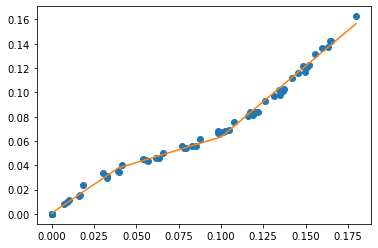

In [4]:
# your desired line segment end locations
x0 = np.array([min(x), 0.039, 0.10, max(x)])

# initialize piecewise linear fit with your x and y data
my_pwlf = pwlf.PiecewiseLinFit(x, y)

# fit the data with the specified break points
# (ie the x locations of where the line segments
# will terminate)
my_pwlf.fit_with_breaks(x0)

# predict for the determined points
xHat = np.linspace(min(x), max(x), num=10000)
yHat = my_pwlf.predict(xHat)

# plot the results
plt.figure()
plt.plot(x, y, 'o')
plt.plot(xHat, yHat, '-')
plt.show()

num acquisition: 1, time elapsed: 0.45s
num acquisition: 2, time elapsed: 1.21s
num acquisition: 3, time elapsed: 1.93s
num acquisition: 4, time elapsed: 2.85s
num acquisition: 5, time elapsed: 3.55s
num acquisition: 6, time elapsed: 4.72s
num acquisition: 7, time elapsed: 5.85s
num acquisition: 8, time elapsed: 6.36s
num acquisition: 9, time elapsed: 13.88s
num acquisition: 10, time elapsed: 14.46s
num acquisition: 11, time elapsed: 19.20s
num acquisition: 12, time elapsed: 20.01s
num acquisition: 13, time elapsed: 22.64s
num acquisition: 14, time elapsed: 23.10s
num acquisition: 15, time elapsed: 23.68s

 
 Opt found 

Optimum number of line segments: [3.]
Function value: 0.0004413158856116556


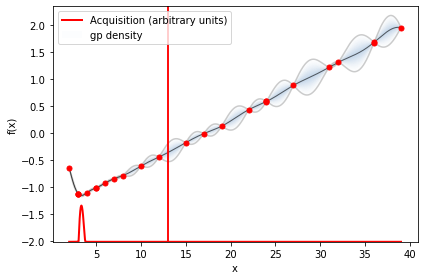

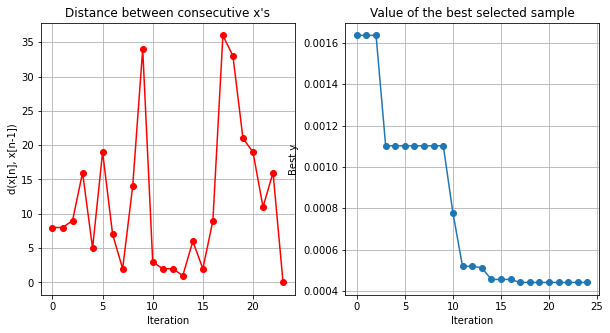

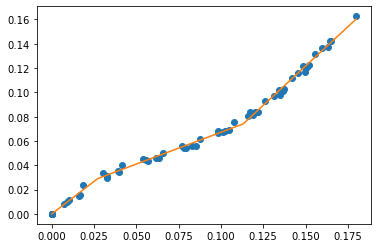

In [5]:
from GPyOpt.methods import BayesianOptimization
# initialize piecewise linear fit with your x and y data
my_pwlf = pwlf.PiecewiseLinFit(x, y)

# define your objective function


def my_obj(x):
    # define some penalty parameter l
    # you'll have to arbitrarily pick this
    # it depends upon the noise in your data,
    # and the value of your sum of square of residuals
    l = y.mean()*0.001
    f = np.zeros(x.shape[0])
    for i, j in enumerate(x):
        my_pwlf.fit(j[0])
        f[i] = my_pwlf.ssr + (l*j[0])
    return f


# define the lower and upper bound for the number of line segments
bounds = [{'name': 'var_1', 'type': 'discrete',
           'domain': np.arange(2, 40)}]

np.random.seed(12121)

myBopt = BayesianOptimization(my_obj, domain=bounds, model_type='GP',
                              initial_design_numdata=10,
                              initial_design_type='latin',
                              exact_feval=True, verbosity=True,
                              verbosity_model=False)
max_iter = 30

# perform the bayesian optimization to find the optimum number
# of line segments
myBopt.run_optimization(max_iter=max_iter, verbosity=True)

print('\n \n Opt found \n')
print('Optimum number of line segments:', myBopt.x_opt)
print('Function value:', myBopt.fx_opt)
myBopt.plot_acquisition()
myBopt.plot_convergence()

# perform the fit for the optimum
my_pwlf.fit(myBopt.x_opt)
# predict for the determined points
xHat = np.linspace(min(x), max(x), num=10000)
yHat = my_pwlf.predict(xHat)

# plot the results
plt.figure()
plt.plot(x, y, 'o')
plt.plot(xHat, yHat, '-')
plt.show()

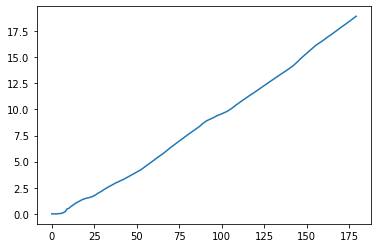

In [9]:
plt.plot(student_1_strain[0,:])

In [12]:
x = np.arange(0,180)
y = student_1_strain[0,:]

my_pwlf = pwlf.PiecewiseLinFit(x, y)

# define your objective function


def my_obj(x):
    # define some penalty parameter l
    # you'll have to arbitrarily pick this
    # it depends upon the noise in your data,
    # and the value of your sum of square of residuals
    l = y.mean()*0.01
    f = np.zeros(x.shape[0])
    for i, j in enumerate(x):
        my_pwlf.fit(j[0])
        f[i] = my_pwlf.ssr + (l*j[0])
    return f


# define the lower and upper bound for the number of line segments
bounds = [{'name': 'var_1', 'type': 'discrete',
           'domain': np.arange(2, 12)}]

np.random.seed(42)

myBopt = BayesianOptimization(my_obj, domain=bounds, model_type='GP',
                              initial_design_numdata=10,
                              initial_design_type='latin',
                              exact_feval=True, verbosity=True,
                              verbosity_model=False)
max_iter = 30

# perform the bayesian optimization to find the optimum number
# of line segments
myBopt.run_optimization(max_iter=max_iter, verbosity=True)

print('\n \n Opt found \n')
print('Optimum number of line segments:', myBopt.x_opt)
print('Function value:', myBopt.fx_opt)
myBopt.plot_acquisition()
myBopt.plot_convergence()

# perform the fit for the optimum
my_pwlf.fit(myBopt.x_opt)
# predict for the determined points
xHat = np.arange(0,180)
yHat = my_pwlf.predict(xHat)

# plot the results
plt.figure()
plt.plot(x, y, 'o')
plt.plot(xHat, yHat, '-')
plt.show()

KeyboardInterrupt: 